# Exercício 02

### 1. Grave quatro sinais de voz ou adquirir,2 do sexo masculino e 2 do sexo feminino e, se possível, pelo menos 1 de criança;
### 2. Determine a frequência fundamental para sinais de voz por meio de, pelo menos, dois métodos diferentes (AMDF e Autocorrelação). Faça com que o programa detecte se o sinal de voz pertence ao gênero feminino, masculino, ou se é de criança (caso haja).
### 3. Use o software Praat para obter a frequência fundamental dos mesmos sinais e compare com o que você obteve.
### 4. Faça alguns comentários sobre os resultados obtidos, plote todos os gráficos, inclusive do software Praat.

In [1]:
import IPython
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

if '..' not in sys.path:
    sys.path.insert(0, '..')
    
from modulos.sigproc import framesig
from modulos.faps import energia, ZCR
import pandas as pd

In [2]:
speech_list = glob.glob('../som/*.wav')
speech_list.sort()
speech_list

['../som/avsn3.wav',
 '../som/faban3.wav',
 '../som/pedroivo.wav',
 '../som/slnccn3.wav',
 '../som/vjdvn3.wav']

In [3]:
choose_audio = speech_list[1]
IPython.display.Audio(f'{choose_audio}')

In [4]:
NomeArquivo = choose_audio
fs,sinal = wavfile.read(NomeArquivo)
Ts=1/fs

print(f'Frequência: {fs}Hz')
print(f'Amostras: {len(sinal)}')
print(f'Duração do sinal: {len(sinal)/fs}s')

Frequência: 22050Hz
Amostras: 14656
Duração do sinal: 0.6646712018140589s


In [5]:
amostras_ms = int(fs / 1000)
frame_time = 52
amostras_frame = amostras_ms * frame_time
nFrames = int(len(sinal) / amostras_frame)      
print(f'Número de amostras/frames : {amostras_frame}')
print ('Número de frames:', nFrames)

Número de amostras/frames : 1144
Número de frames: 12


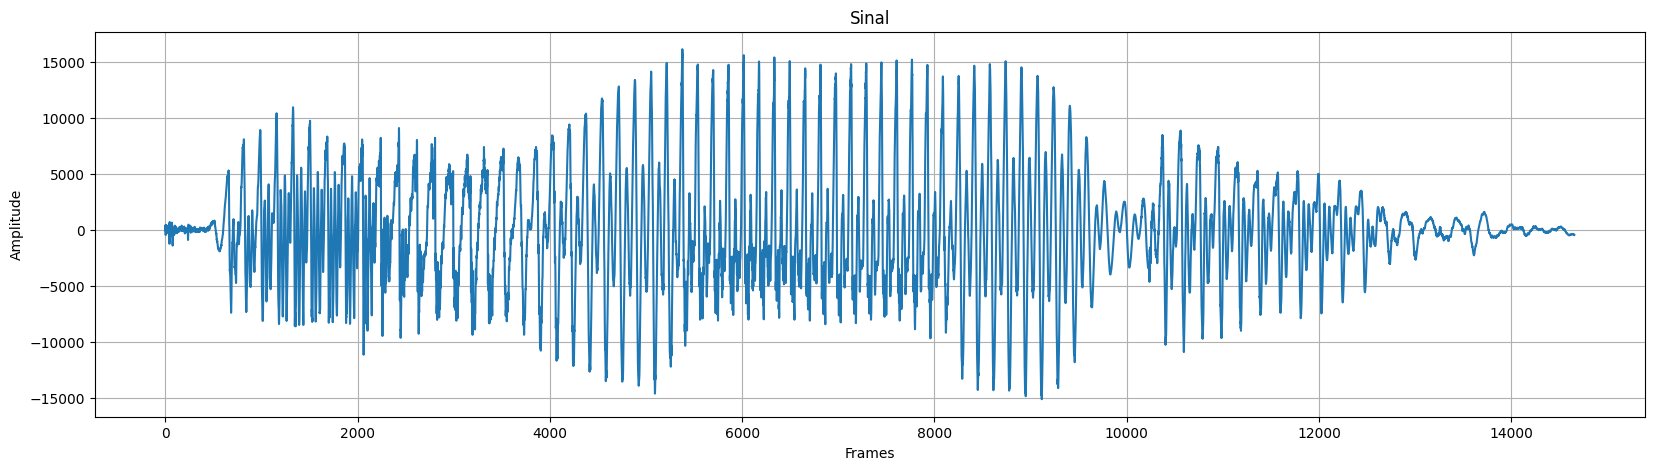

In [6]:
plt.figure(figsize=(20,5))
plt.plot(sinal)
plt.title('Sinal')
plt.xlabel('Frames')
plt.ylabel('Amplitude')
plt.grid()

## Normalizando o sinal

In [7]:
max(abs(sinal))

16168

In [8]:
sinal = sinal / max(abs(sinal))                                                                        
t=(np.arange(len(sinal)))/fs
assert min(sinal) >= -1 and max(sinal) <= 1

In [9]:
sinal

array([ 0.02263731,  0.01645225, -0.00296883, ..., -0.02535873,
       -0.02585354, -0.02628649])

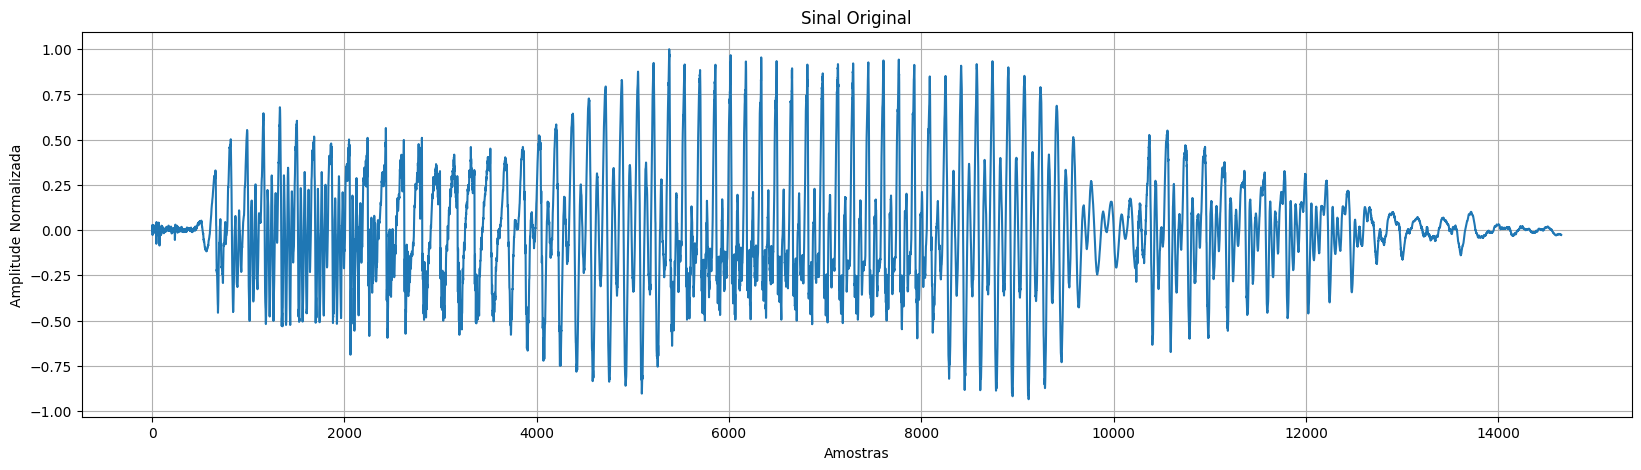

In [10]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.title('Sinal Original'), plt.xlabel('Amostras'), plt.ylabel('Amplitude Normalizada')  
plt.plot(sinal)
plt.grid()

In [11]:
import librosa

In [12]:
y, sr = librosa.load(choose_audio)

In [13]:
choose_audio = speech_list[3]
IPython.display.Audio(y, rate=sr)

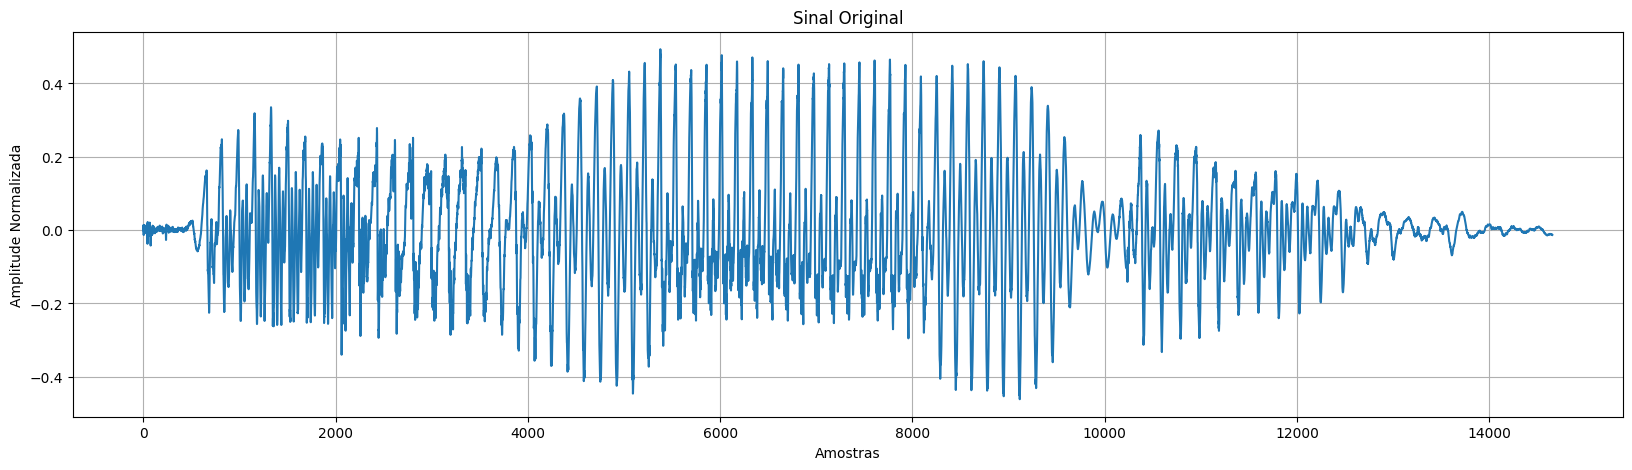

In [14]:
#y2 = y[6000:24000]
plt.figure(figsize=(20,5))
plt.figure(1)
plt.title('Sinal Original'), plt.xlabel('Amostras'), plt.ylabel('Amplitude Normalizada')  
plt.plot(y)
plt.grid()

(0.0, 880.0)

<Figure size 2000x500 with 0 Axes>

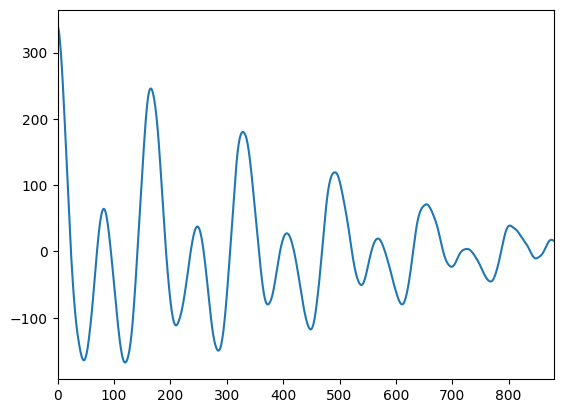

In [15]:
fig1 = plt.figure(figsize=(20,5))
fig1, ax = plt.subplots()
auto_correlation = librosa.autocorrelate(y)
plt.plot(auto_correlation)
ax.set_xlim(0, 880*1)

In [16]:
peaks = find_peaks(auto_correlation)[0]
peaks

array([   82,   165,   248,   329,   406,   492,   568,   654,   726,
         802,   876,   959,  1040,  1119,  1200,  1279,  1363,  1439,
        1521,  1601,  1679,  1760,  1837,  1923,  2002,  2085,  2165,
        2246,  2327,  2405,  2490,  2556,  2642,  2717,  2801,  2881,
        2963,  3045,  3129,  3210,  3295,  3374,  3459,  3539,  3623,
        3704,  3786,  3869,  3950,  4034,  4116,  4200,  4282,  4367,
        4449,  4537,  4617,  4706,  4786,  4875,  4961,  5045,  5135,
        5217,  5306,  5395,  5475,  5566,  5653,  5735,  5823,  5909,
        5988,  6093,  6148,  6263,  6302,  6429,  6459,  6621,  6681,
        6772,  6847,  6931,  7014,  7060,  7096,  7224,  7398,  7493,
        7578,  7665,  7755,  7837,  7925,  8009,  8092,  8174,  8260,
        8344,  8429,  8522,  8596,  8701,  8771,  8878,  8941,  9054,
        9114,  9224,  9291,  9391,  9460,  9568,  9626,  9672,  9736,
        9850,  9914,  9956, 10028, 10059, 10101, 10158, 10206, 10245,
       10295, 10337,

In [21]:
auto_correlation[peaks[3]]

180.17425563931465

In [23]:
pitch = fs/(peaks[3] - peaks[1])
print(pitch)

134.4512195121951


In [24]:
limiares = [105, 213, 290] 
resultado = min(limiares, key=lambda x:abs(x-pitch))

if resultado == 105:
    print("A voz aparenta ser masculina")
elif resultado == 213:
    print("A voz aparenta ser feminina")
elif resultado == 290:
    print("A voz aparenta ser feminina")

A voz aparenta ser masculina
